In [4]:
import os
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

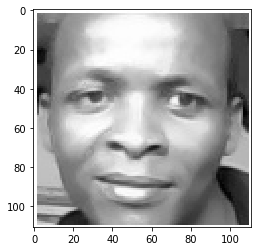

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

base_dir = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/train'

CATEGORIES = ["keith", "martin","keithmartin", "jay", "rodney", "florence", "denzel", "slyvia", "albert", "luidgi"]

for category in CATEGORIES:
    path = os.path.join(base_dir, 'albert')  # create path to images of diffrent people
    for img in os.listdir(path):  # iterate over each images of diffrent people
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [6]:
print(img_array)


[[254 255 252 ... 253 255 255]
 [255 251 255 ... 255 255 250]
 [253 255 123 ... 112 112 255]
 ...
 [255 255 197 ...  63  63 254]
 [255 253 212 ...  62  60 254]
 [255 255 255 ... 255 255 255]]


In [7]:
print(img_array.shape)

(111, 111)


#### Resizing the images

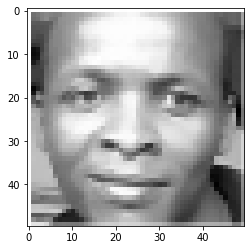

In [8]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []  

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(base_dir, 'albert')  # create path to albert
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each images of albert
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 44/44 [00:00<00:00, 2024.37it/s]

440


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

7
9
8
5
6
4
9
5
7
8


In [30]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)


[[[[255]
   [255]
   [255]
   ...
   [255]
   [254]
   [255]]

  [[255]
   [ 53]
   [ 56]
   ...
   [ 23]
   [ 22]
   [ 94]]

  [[254]
   [ 59]
   [ 61]
   ...
   [ 44]
   [ 42]
   [104]]

  ...

  [[254]
   [124]
   [124]
   ...
   [109]
   [111]
   [144]]

  [[253]
   [124]
   [122]
   ...
   [110]
   [112]
   [148]]

  [[254]
   [163]
   [162]
   ...
   [152]
   [152]
   [181]]]]


In [31]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [32]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [43]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3)

Train on 308 samples, validate on 132 samples
Epoch 1/5
308/308 [==============================] - 8s 26ms/sample - loss: 22.0162 - accuracy: 0.1071 - val_loss: 18.0530 - val_accuracy: 0.0909
Epoch 2/5
308/308 [==============================] - 8s 25ms/sample - loss: 21.5487 - accuracy: 0.1039 - val_loss: 18.0530 - val_accuracy: 0.0909
Epoch 3/5
308/308 [==============================] - 8s 25ms/sample - loss: 21.5487 - accuracy: 0.1039 - val_loss: 18.0530 - val_accuracy: 0.0909
Epoch 4/5
308/308 [==============================] - 8s 26ms/sample - loss: 21.5487 - accuracy: 0.1039 - val_loss: 18.0530 - val_accuracy: 0.0909
Epoch 5/5
308/308 [==============================] - 9s 30ms/sample - loss: 21.5487 - accuracy: 0.1039 - val_loss: 18.0530 - val_accuracy: 0.0909


In [16]:
print(X.shape, X.dtype)

print(y.shape, y.dtype)

(440, 50, 50, 1) float64
(440,) int64
